<a href="https://colab.research.google.com/github/SteamTec/GreenScreen/blob/main/Titanic_Predictor_Exploratory_Data_Analysis_EDA_Titanic12_dataset_05_29_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset for review.  Load varous packages to assist in the dataset review. 

This document is a thorough overview of my process for building a predictive model for Kaggle’s Titanic competition. I will provide all my essential steps in this model as well as the reasoning behind each decision I made. This model achieves a score of 80.38%, which is in the top 10% of all submissions at the time of this writing. This is a great introductory modeling exercise due to the simple nature of the data, yet there is still a lot to be gleaned from following a process that ultimately yields a high score.  

By:  **Zlatan Kremonic   30 Jan 2017**


File calls modified for use by Reid Becker, Machine Learning Course, STEAM Tech Teams 5/29/2023.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Attach the training dataset
#Reid is using a different dataset housed in STEAM Tech Teams' Greenscreen folder
!wget https://github.com/SteamTec/GreenScreen/blob/main/Titanic1.Training.Dataset.csv?raw=true

# Attach the test dataset (includes student names)
#Reid is using a separate Test dataset housed in STEAM Tech Teams' Greenscreen folder
!wget https://github.com/SteamTec/GreenScreen/blob/main/test3_Titanic_Dataset_Students.csv?raw=true

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Line below for Kaggle file analysis
#import os 
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
#Set the maximum columns and rows when displaying pandas DataFrame
pd.options.display.max_rows=200
pd.options.display.max_columns=200


--2023-05-29 21:19:25--  https://github.com/SteamTec/GreenScreen/blob/main/Titanic1.Training.Dataset.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SteamTec/GreenScreen/raw/main/Titanic1.Training.Dataset.csv [following]
--2023-05-29 21:19:25--  https://github.com/SteamTec/GreenScreen/raw/main/Titanic1.Training.Dataset.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SteamTec/GreenScreen/main/Titanic1.Training.Dataset.csv [following]
--2023-05-29 21:19:25--  https://raw.githubusercontent.com/SteamTec/GreenScreen/main/Titanic1.Training.Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [ ]:
# Load the training and test DataFrames
train = pd.read_csv('Titanic1.Training.Dataset.csv?raw=true')

test = pd.read_csv('test3_Titanic_Dataset_Students.csv?raw=true')
train.head(5)
#test.head(5)
#np.shape(train)
#np.shape(test)

,PassengerId,Survived,Pclass,Name_Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Create a matrix to save the PassergerId and Name

# Create a matrix of the passengerId and name elements
saved_test_data = test[['PassengerId', 'Name']]

# Save the matrix to a file
saved_test_data.to_csv('saved.test.data', index=False)

#test.info()
#saved_test_data.info()
saved_test_data.loc[0:20]
#test.loc[0:20]

,PassengerId,Name
0,892,"Becker, Mr. Reid"
1,893,"Name2, Miss. Name2"
2,894,"Name3, Maj. Name3"
3,895,"Name4, Mrs. Name4"
4,896,"Name5, Master. Name5"
5,897,"Name6, Miss. Name6"
6,898,"Name7, Miss. Name7"
7,899,"Name8, Jonkheer. Name8"
8,900,"Name9, Master. Name9"
9,901,"Name10, Miss. Name10"


# Exploratory Data Analysis

In [ ]:
#Let's look at the size and shape of the test DataFram df
#train.shape
#test.shape

In [ ]:
#To get more information on the dataset, use the info() function.
#To see both on the same screen, print a few lines between them.
#Due to the lack of time, we will not perform Data Exploration.
#We must ensure there are NO NULL records in "train" or "test."
train.info()
print("This is a line.\n\nThis is another line.")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name_Title   891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
This is a line.

This is another line.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       

**Information**

The definition of each code is as follows:
 Survival - Survival (0 = No; 1 = Yes)
 Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 Name - Name
 Sex - Sex
 Age - Age
 Sibsp - Number of Siblings/Spouses Aboard
 Parch - Number of Parents/Children Aboard
 Ticket - Ticket Number
 Fare - Passenger Fare
 Cabin - Cabin number
 Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
 Boat - Lifeboat (if survived)
 Body - Body number (if did not survive and body was recovered)

In [ ]:
#train.isna().sum() #Display the number of null values in each column of the "train" dataset.
#test.isna().sum() #Display the number of null values in each column of the "test" dataset,

In [ ]:
#The code from numpy.ma.core import masked_less imports the masked_less function from the numpy.ma.core module. 
#The masked_less function is used to mask an array where the values are less than a given value. 
#The function takes two arguments: the array to be masked and the value to compare the array values to. 
#The function returns a masked array, where the values that are less than the given value are masked (i.e., they are set to NaN).
from numpy.ma.core import masked_less


Visualization of Datasets

In [ ]:
# Create a histogram of the relevant dataset elements.  Examine it for possible trends or abnormalities.
#g = sns.histplot(train['Age'], color = 'blue')

In [ ]:
# Analyze survival rate by clsss 
#train['Survived'].groupby(train['Pclass']).mean()

In [ ]:
# Numerical analysis of elements in the dataset
#from pydoc import describe
#train['Age'].describe()

In [ ]:
#train.hist(bins=10,figsize=(15,12),grid=False);

In [ ]:
# Generic Scatter Plot: Enter the dataset features you want to compare. Scatter plots are sometimes useful, not in this case. 
#plt.scatter(train[''], train[''], color= "Red", label= "" )
#plt.ylabel("")
#plt.xlabel("")
#plt.title("")
#plt.legend()
#plt.show()


In [ ]:
# Heat Map
#List all column names
#print(train.columns)

In [ ]:
#Calculating correlation between each pair of variables, notice the variables that have the highest correlation with "Survived."
corr_matrix=train.corr().round(2)
print(corr_matrix)

             PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId         1.00     -0.01   -0.04  0.04  -0.06  -0.00  0.02
Survived           -0.01      1.00   -0.34 -0.09  -0.04   0.08  0.25
Pclass             -0.04     -0.34    1.00 -0.36   0.08   0.02 -0.56
Age                 0.04     -0.09   -0.36  1.00  -0.29  -0.19  0.11
SibSp              -0.06     -0.04    0.08 -0.29   1.00   0.41  0.16
Parch              -0.00      0.08    0.02 -0.19   0.41   1.00  0.21
Fare                0.02      0.25   -0.56  0.11   0.16   0.21  1.00


<ipython-input-14-1435d7e01add>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train.corr().round(2)


<Axes: >

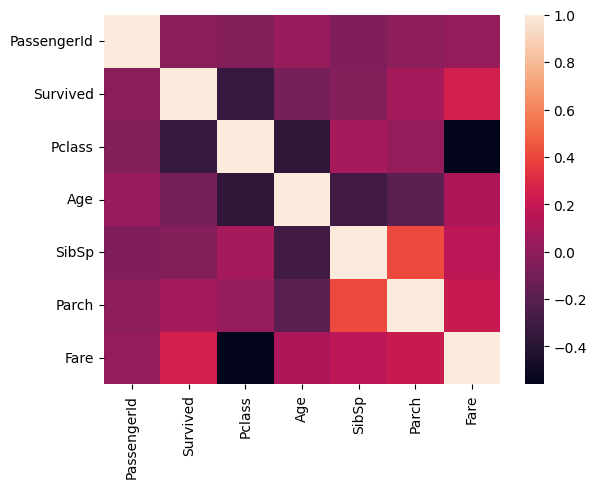

In [ ]:
#Creating a seaborn heatmap. You can visualize these intercorrelations with a Heat Map.
sns.heatmap(corr_matrix)

**Feature Engineering**
Having done our cursory exploration of the variables, we now have a pretty good idea of how we want to transform our variables in preparation for our final dataset. We will perform our feature engineering through a series of helper functions that each serve a specific purpose.
This first function creates two separate columns: a numeric column indicating the length of a passenger’s Name field, and a categorical column that extracts the passenger’s title. We are altering the data to be used by the Random Forest algorithm.

**Run all the functions to avoid an error later in the analysis.

**Notice you must make the same changes to the test and training datasets


In [ ]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test


In [ ]:
# Next, we impute the null values of the Age column by filling in the mean value of the passenger’s corresponding title and class. 
# This more granular approach to imputation should be more accurate than merely taking the mean age of the population.
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    train['mean'] = train.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean')
    train['Age'] = train['Age'].fillna(train['mean'])
    z = test.merge(train, on=['Name_Title', 'Pclass'], how='left').drop_duplicates(['PassengerId_x'])
    test['Age'] = np.where(test['Age'].isnull(), z['mean'], test['Age'])
    test['Age'] = test['Age'].fillna(test['Age'].mean())
    del train['mean']
    return train, test
    


In [ ]:
# We combine the SibSp and Parch columns into a new variable that indicates family size, and group the family size 
#  variable into three categories.
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test


In [ ]:
# The Ticket column is used to create Ticket_Len, which indicates the length of the Ticket field.
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test


In [ ]:
# The following two functions extract the first letter of the Cabin column and its number, respectively.
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test



def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test


In [ ]:
# We fill the null values in the Embarked column with the most commonly occuring value, which is ‘S.’
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test


In [ ]:
# We also fill in the one missing value of Fare in our test set with the mean value of Fare from the training 
#  set (transformations of test set data must always be fit using training data).
#test['Fare'].fillna(train['Fare'].mean(), inplace = True)


In [ ]:
# Next, because we are using scikit-learn, we must convert our categorical columns into dummy variables. 
#  The following function does this, and then it drops the original categorical columns. It also makes sure that each 
#  category is present in both the training and test datasets.
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test


In [ ]:
# Our last helper function drops any columns that haven’t already been dropped. In our case, we only need to drop 
#  the PassengerId column, which we have decided is not useful for our problem (by the way, I’ve confirmed this with a separate test). 
#  Note that dropping the PassengerId column here means that we’ll have to load it later when creating our submission file.
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [ ]:
# Having built our helper functions, we can now execute them in order to build our dataset that will be used in the model:

train = pd.read_csv('Titanic1.Training.Dataset.csv?raw=true')

train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
train['Fare'].fillna(train['Fare'].mean(), inplace = True)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 
                                              'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)


In [ ]:
# We can see that our final dataset has 28 columns, composed of our target column and 44 predictor variables. 
#  Although highly dimensional datasets can result in high variance, I think we should be fine here.
#len(train.columns)
#len(test.columns)


In [ ]:
#Un-comment and run the functions below to see how the datasets were modified.
#train.loc[5:100]
#test.loc[0:5]

**Hyperparameter Tuning**
We will use grid search to identify the optimal parameters of our random forest model. Because our training dataset is quite small, we can get away with testing a wider range of hyperparameter values. When I ran this on my 8 GB Windows machine, the process took less than ten minutes.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1, 5, 10],
             "min_samples_split" : [2, 4, 10, 12, 16],
             "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Looking at the results of the grid search, we can see that our optimal parameter settings are not at the endpoints 
#  of our provided values, meaning that we do not have to test more values. What else can we say about our optimal values?
#  The min_samples_split parameter is at 10, which should help mitigate overfitting to a certain degree. 
#  This is especially good because we have a relatively large number of estimators (700), which could potentially 
#  increase our generalization error.
print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_) #To print all the intermediate parameter values


0.8383838383838383
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 400}


**Model Estimation and Evaluation**
We are now ready to fit our model using the optimal hyperparameters. The out-of-bag score can give us an unbiased estimate of the model accuracy, and we can see that the score is 82.15%, which is a little higher than our final leaderboard score, indicating that there is some overfitting. This is to be expected due to the fact that our datasets are so small.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=50,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print ("%.4f" % rf.oob_score_) 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8305


In [ ]:
# Let’s take a brief look at our variable importance according to our random forest model. We can see that some of the 
#  original columns we predicted would be important in fact were, including gender, fare, and age. But we also see title, 
#  name length, and ticket length feature prominently, so we can pat ourselves on the back for creating such useful variables.
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]


,variable,importance
21,Name_Title_Mr.,0.167196
1,Fare,0.126202
0,Age,0.100384
12,Sex_female,0.099201
2,Name_Len,0.089178
11,Sex_male,0.070398
8,Pclass_3,0.053482
7,Ticket_Len,0.049290
28,Fam_Size_Big,0.030498
23,Name_Title_Miss.,0.025635


In [ ]:
# Our last step is to predict the target variable and display the report, sample(n=21).

In [ ]:
#Prediction File Submission (see Kaggle for specifications)

predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])

In [ ]:
#np.shape(train)
#np.shape(predictions)
#train.info()
#print("This is a line.\n\nThis is another line.")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         21 non-null     float64
 1   Fare                        21 non-null     float64
 2   Name_Len                    21 non-null     int64  
 3   Age_Null_Flag               21 non-null     int64  
 4   Cabin_num_(1.999, 28.667]   21 non-null     uint8  
 5   Cabin_num_(28.667, 65.667]  21 non-null     uint8  
 6   Cabin_num_(65.667, 148.0]   21 non-null     uint8  
 7   Ticket_Len                  21 non-null     int64  
 8   Pclass_3                    21 non-null     uint8  
 9   Pclass_1                    21 non-null     uint8  
 10  Pclass_2                    21 non-null     uint8  
 11  Sex_male                    21 non-null     uint8  
 12  Sex_female                  21 non-null     uint8  
 13  Embarked_S                  21 non-nu

In [ ]:
#This is the raw output of our predictions.
np.shape(predictions)

(21, 1)

In [ ]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  21 non-null     int64
dtypes: int64(1)
memory usage: 296.0 bytes


In [ ]:
#predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
#np.shape(predictions)
predictions.sample(n=21)

,Survived
1,0
14,1
4,0
9,0
2,0
8,1
11,1
10,0
0,0
19,0


In [ ]:
#Create the Survival Report
# Concatenate the predictions and saved.test.data matrices
survival_report = pd.concat([predictions, saved_test_data], axis=1)

# Sort the survival_report matrix by the passengerId column
survival_report = survival_report.sort_values('PassengerId')

# Replace the Survived column with a text column
survival_report['Survived'] = survival_report['Survived'].replace({0: 'No', 1: 'Yes'})

# Display the survival_report matrix in index order
# and Survived value in the fourth column
print(survival_report[['PassengerId', 'Name', 'Survived']])


    PassengerId                    Name Survived
0           892        Becker, Mr. Reid       No
1           893      Name2, Miss. Name2       No
2           894       Name3, Maj. Name3       No
3           895       Name4, Mrs. Name4      Yes
4           896    Name5, Master. Name5       No
5           897      Name6, Miss. Name6       No
6           898      Name7, Miss. Name7      Yes
7           899  Name8, Jonkheer. Name8       No
8           900    Name9, Master. Name9      Yes
9           901    Name10, Miss. Name10       No
10          902  Name11, Master. Name11       No
11          903     Name12, Mrs. Name12      Yes
12          904    Name13, Miss. Name13       No
13          905      Name14, Mr. Name14       No
14          906     Name15, Mrs. Name15      Yes
15          907  Name16, Master. Name16      Yes
16          908      Name17, Mr. Name17       No
17          909    Name18, Miss. Name18       No
18          910      Name19, Mr. Name19       No
19          911     

# Conclusion
The purpose of this exercise was to provide some more experience on running a model. We used a Random forest model which is a "souped up" Decision Tree model. We have already run a Decision Tree model. 
